<h1> 이미지 별 라벨 구조 </h1>
<br>
<li>분류 번호</li>
<li>box의 중앙 x값 / 이미지의 넓이</li>
<li>box의 중앙 y값 / 이미지의 높이</li>
<li>box의 넓이 / 이미지의 넓이</li>
<li>box의 높이 / 이미지의 높이</li>


In [1]:
filename = '000005_jpg.rf.2459a55dca0ff3afbe13f8d219a9a818'

In [2]:
f = open(f'../train/labels/{filename}.txt','r')
label = ''

while True:
    label = f.readline()
    if label=='':
        break
    print(label)  
f.close()


1 0.1675 0.37316176470588236 0.22 0.3492647058823529

1 0.71125 0.44485294117647056 0.1625 0.27205882352941174


<h1> 클래스 번호 별 매핑값 </h1>
<br>
<p> classlist = ['head','helmet','person']  </p>

In [3]:
from matplotlib import pyplot as plt
from PIL import Image
classlist = ['head','helmet','person']



In [4]:
img = Image.open(f'../train/images/{filename}.jpg','r')

<h1>image_crop_by_label 설명</h1>
<br>
<p>input : label, img</p>
<p> 1. 들어온 label값으로부터 box의 중앙 x값 / 이미지의 넓이, box의 중앙 y값 / 이미지의 높이, box의 넓이 / 이미지의 넓이, box의 높이 / 이미지의 높이 를 받는다.</p>
<p> 2. 해당 값으로 부터 box의 중앙값x,y와 box의 넓이,높이를 구한다.</p>
<p> 3. img.crop을 통해 해당 이미지를 자른다.  img.crop의 input은 (좌측 상단 X좌표, 좌측상단 Y좌표, 우측 하단 X좌표, 우측 하단 Y좌표) 이다</p>


In [6]:
def image_crop_by_label(label,img):        
    label = label.split(' ')
    width,height = img.size
    class_ = int(label[0])
    box_center_X = float(label[1]) * width
    box_center_Y = float(label[2]) * height 
    box_width = float(label[3]) * width 
    box_height = float(label[4][:-2]) * height 
    
    print(classlist[class_], box_center_X, box_center_Y, box_width, box_height,width,height)
    
    cropValue = (box_center_X - box_width/2, box_center_Y - box_height/2, box_center_X + box_width/2, box_center_Y + box_height/2) #좌측상단 X, 좌측상단 Y,우측하단X, 우측상단Y
    plt.imshow(img.crop(cropValue))
    plt.show()


<h1> 각 라벨 별 해당하는 이미지와 분류값을 확인하세요 </h1>


helmet 67.0 101.5 88.0 94.99999999999974 400 272


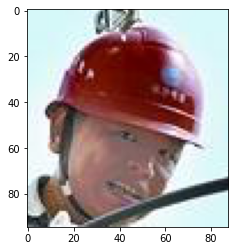

helmet 284.5 121.0 65.0 73.9999999999998 400 272


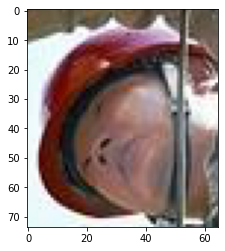

In [7]:
f = open(f'../train/labels/{filename}.txt','r')
label = ''

while True:
    label = f.readline()
    if label=='':
        break
    image_crop_by_label(label,img)    
    
    
    
f.close()

    

